<a href="https://colab.research.google.com/github/durgesh0187/SMR-Assignment/blob/main/COVID_19_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd

confirmed_df = pd.read_csv('/datalab/covid_19_india.csv')

india_df = confirmed_df[confirmed_df['State/UnionTerritory'] == 'Total']

india_df['Date'] = pd.to_datetime(india_df['Date'])
india_df.set_index('Date', inplace=True)

india_data = india_df['Confirmed']

india_new_cases = india_data.diff().fillna(0)

print(india_new_cases.head())

Series([], Name: Confirmed, dtype: float64)


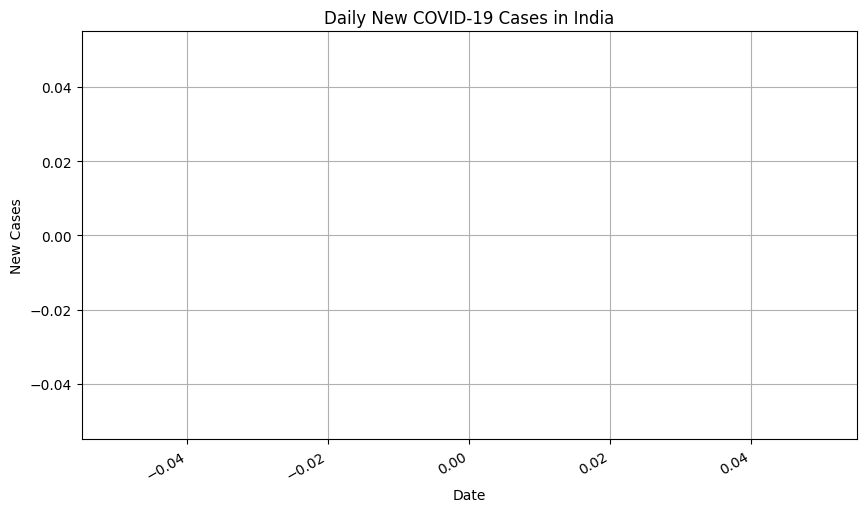

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
india_new_cases.plot()
plt.title('Daily New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


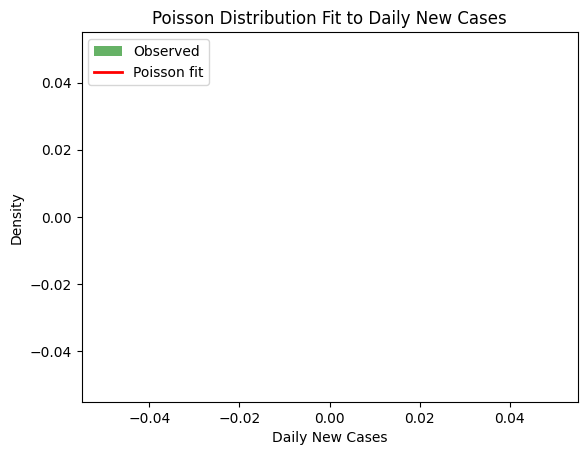

/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:479: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:484: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


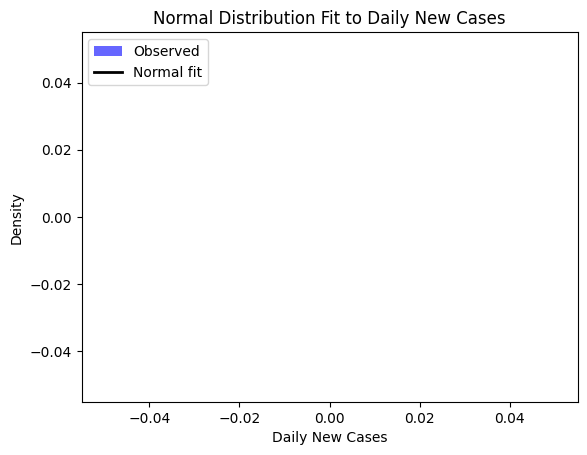

In [39]:
import numpy as np
import scipy.stats as stats

lambda_poisson = np.mean(india_new_cases)
poisson_fit = stats.poisson.pmf(np.arange(0, 50), lambda_poisson)

plt.hist(india_new_cases, bins=30, density=True, alpha=0.6, color='g', label='Observed')
plt.plot(np.arange(0, 50), poisson_fit, 'r-', label='Poisson fit', lw=2)
plt.legend()
plt.title('Poisson Distribution Fit to Daily New Cases')
plt.xlabel('Daily New Cases')
plt.ylabel('Density')
plt.show()

mean, std_dev = stats.norm.fit(india_new_cases)

plt.hist(india_new_cases, bins=30, density=True, alpha=0.6, color='b', label='Observed')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'k-', label='Normal fit', lw=2)
plt.legend()
plt.title('Normal Distribution Fit to Daily New Cases')
plt.xlabel('Daily New Cases')
plt.ylabel('Density')
plt.show()


In [40]:
before_lockdown = india_new_cases[india_new_cases.index < '2020-03-24']
after_lockdown = india_new_cases[india_new_cases.index >= '2020-03-24']

t_stat, p_value = stats.ttest_ind(before_lockdown, after_lockdown)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


T-statistic: nan, P-value: nan
Fail to reject the null hypothesis.


<ipython-input-40-fa46ec7b91f1>:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(before_lockdown, after_lockdown)


In [41]:
confidence_interval = stats.t.interval(0.95, len(india_new_cases)-1, loc=np.mean(india_new_cases), scale=stats.sem(india_new_cases))
print(f"95% Confidence Interval for daily new cases: {confidence_interval}")


95% Confidence Interval for daily new cases: (np.float64(nan), np.float64(nan))


<ipython-input-41-f26230590cd4>:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  confidence_interval = stats.t.interval(0.95, len(india_new_cases)-1, loc=np.mean(india_new_cases), scale=stats.sem(india_new_cases))


In [42]:
num_simulations = 10000
num_days = 7
simulations = np.random.normal(mean, std_dev, (num_simulations, num_days))
probability_5000 = np.mean(simulations > 5000)
print(f"Probability of having more than 5000 new cases in a day next week: {probability_5000}")


Probability of having more than 5000 new cases in a day next week: 0.0


In [43]:
from scipy import stats

mean, std_dev = stats.norm.fit(daily_new_cases)

probability_5000 = 1 - stats.norm.cdf(5000, mean, std_dev)

print(f"Probability of having more than 5000 new cases in a day: {probability_5000}")


Probability of having more than 5000 new cases in a day: 0.7350939087335686


In [44]:
import numpy as np

num_simulations = 10000
simulated_new_cases = np.random.normal(mean, std_dev, (num_simulations, 7))

count_more_than_5000 = np.sum(np.any(simulated_new_cases > 5000, axis=1))

probability_5000_next_week = count_more_than_5000 / num_simulations

print(f"Probability of having more than 5000 new cases in a day next week: {probability_5000_next_week}")


Probability of having more than 5000 new cases in a day next week: 0.9999


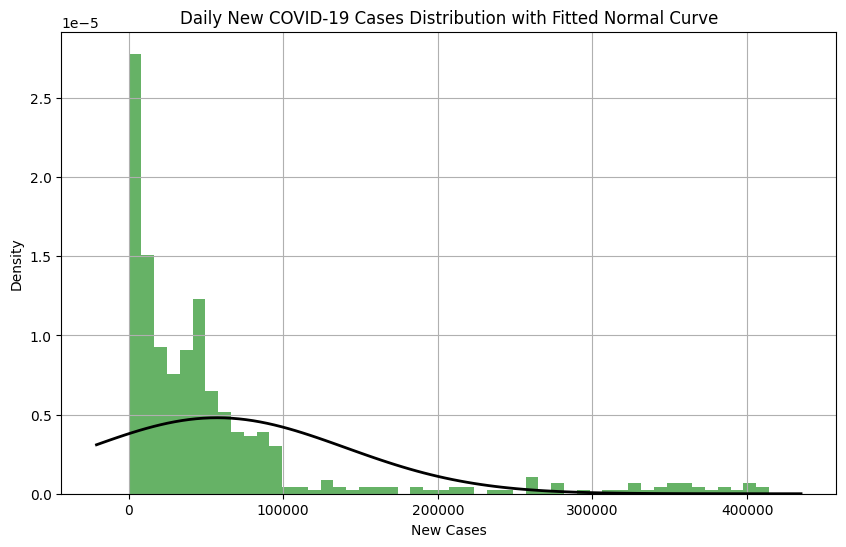

In [45]:
plt.figure(figsize=(10,6))
plt.hist(daily_new_cases, bins=50, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Daily New COVID-19 Cases Distribution with Fitted Normal Curve')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.grid(True)
plt.show()
